# Basic Plotting for Cactus

In [ ]:
%matplotlib notebook

In [1]:
import os, sys, re, h5py
import numpy as np
print("Cactus files to visualize:")
for file in os.listdir("output"):
    if re.match(r'.*\.h5',file):
        print(" ",file)

Cactus files to visualize:
  r.xy.h5
  y.xy.h5
  x.xy.h5
  eta.xy.h5
  v.xy.h5
  z.xy.h5
  u.xy.h5


In [12]:
import matplotlib.pyplot as plt
print("Color Schemes:")
for cm in dir(plt.cm):
    if hasattr(getattr(plt.cm,cm),'is_gray'):
        print(cm,end=' ')
print()

# Set the color scheme you wish to use below...
global_cmap = plt.cm.nipy_spectral 

Color Schemes:
Accent Accent_r Blues Blues_r BrBG BrBG_r BuGn BuGn_r BuPu BuPu_r CMRmap CMRmap_r Dark2 Dark2_r GnBu GnBu_r Greens Greens_r Greys Greys_r OrRd OrRd_r Oranges Oranges_r PRGn PRGn_r Paired Paired_r Pastel1 Pastel1_r Pastel2 Pastel2_r PiYG PiYG_r PuBu PuBuGn PuBuGn_r PuBu_r PuOr PuOr_r PuRd PuRd_r Purples Purples_r RdBu RdBu_r RdGy RdGy_r RdPu RdPu_r RdYlBu RdYlBu_r RdYlGn RdYlGn_r Reds Reds_r Set1 Set1_r Set2 Set2_r Set3 Set3_r Spectral Spectral_r Vega10 Vega10_r Vega20 Vega20_r Vega20b Vega20b_r Vega20c Vega20c_r Wistia Wistia_r YlGn YlGnBu YlGnBu_r YlGn_r YlOrBr YlOrBr_r YlOrRd YlOrRd_r afmhot afmhot_r autumn autumn_r binary binary_r bone bone_r brg brg_r bwr bwr_r cool cool_r coolwarm coolwarm_r copper copper_r cubehelix cubehelix_r flag flag_r gist_earth gist_earth_r gist_gray gist_gray_r gist_heat gist_heat_r gist_ncar gist_ncar_r gist_rainbow gist_rainbow_r gist_stern gist_stern_r gist_yarg gist_yarg_r gnuplot gnuplot2 gnuplot2_r gnuplot_r gray gray_r hot hot_r hsv h

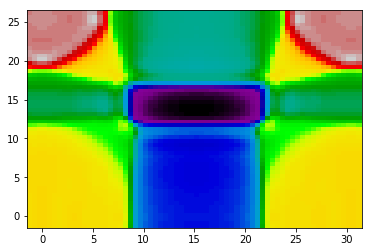

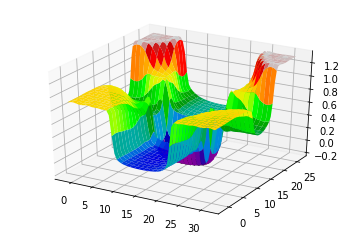

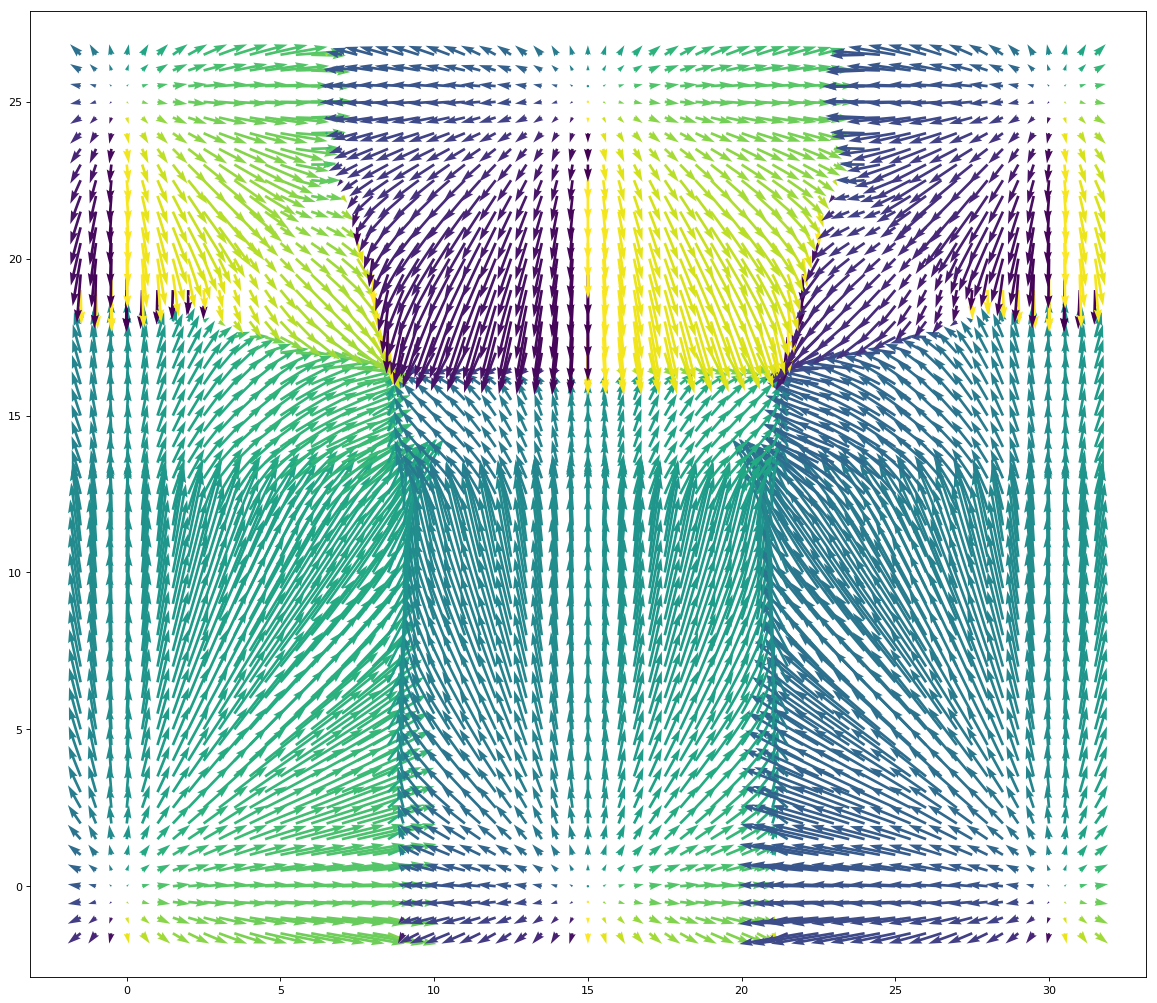

In [13]:
from mpl_toolkits.mplot3d import Axes3D

def loadh5(fname,tm):
    f = h5py.File("output/"+fname)
    data = {}
    for nm in f:
        if not hasattr(f[nm],"shape"):
            continue
        g = re.search(r'it=(\d+)\s+tl=\d+\s+(rl=\d+\s+c=\d+)',nm)
        if g:
            it = int(g.group(1))
            if it != tm:
                continue
            data[g.group(2)] = f[nm]
    return data

# Your basic surface plot
def assemble_data(fname,tm):
    data = loadh5(fname,tm)
    xvals = loadh5("x.xy.h5",0)
    yvals = loadh5("y.xy.h5",0)
    xs = {}
    ys = {}
    for nm in data:
        for x in np.unique(xvals[nm]):
            xs[x] = 0
        for y in np.unique(yvals[nm]):
            ys[y] = 0
    xn = sorted(xs.keys())
    yn = sorted(ys.keys())
    for i in range(len(xn)):
        xs[xn[i]] = i
    for j in range(len(yn)):
        ys[yn[j]] = j
    ndata = np.zeros((len(yn),len(xn)))
    nxvals = np.zeros((len(yn),len(xn)))
    nyvals = np.zeros((len(yn),len(xn)))
    for nm in data:
        xl1, xh1 = xs[xvals[nm][0,0]], xs[xvals[nm][-1,-1]]+1
        yl1, yh1 = ys[yvals[nm][0,0]], ys[yvals[nm][-1,-1]]+1
        ndata[yl1:yh1, xl1:xh1] = data[nm]
        nxvals[yl1:yh1, xl1:xh1] = xvals[nm]
        nyvals[yl1:yh1, xl1:xh1] = yvals[nm]
    return (nxvals, nyvals, ndata)

def colorplot(fname,tm):
    xvals, yvals, data = assemble_data(fname,tm)
    ax = plt.gca()
    ax.pcolormesh(xvals,yvals,data,cmap=global_cmap)
    plt.show()

def surfaceplot(fname,tm):
    xvals, yvals, data = assemble_data(fname,tm)
    ax = plt.gca(projection='3d')
    ax.plot_surface(xvals,yvals,data,cmap=global_cmap)
    plt.show()

def vectorplot(tm,scale):
    x, y, u = assemble_data("u.xy.h5",tm)
    x, y, v = assemble_data("v.xy.h5",tm)
    c = (np.arctan2(u,v))
    ax = plt.gca()
    ax.quiver(x,y,u,v,c,scale=scale)
    plt.show()

tm = 100
colorplot("eta.xy.h5",tm)
surfaceplot("eta.xy.h5",tm)
plt.figure(figsize=(18, 16), dpi= 80)
vectorplot(tm,20)